# Zestaw 9. Page Rank

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## 1. Prosty ranking wierzchołków

#### graf

In [17]:
def get_connected_graph(n):
    graph = nx.generators.directed.random_k_out_graph(n, n-1, n-1)
    return graph

In [92]:
def draw_graph(graph, pos):
    plt.figure(figsize=(10, 5))
    #nx.draw_networkx(graph, pos, with_labels=True, node_color='lawngreen')
    labels = {n: graph.nodes[n].get('weight', ' ') for n in graph.nodes}
    nx.draw(graph, pos=pos, with_labels=True, labels=labels, node_color='lawngreen')

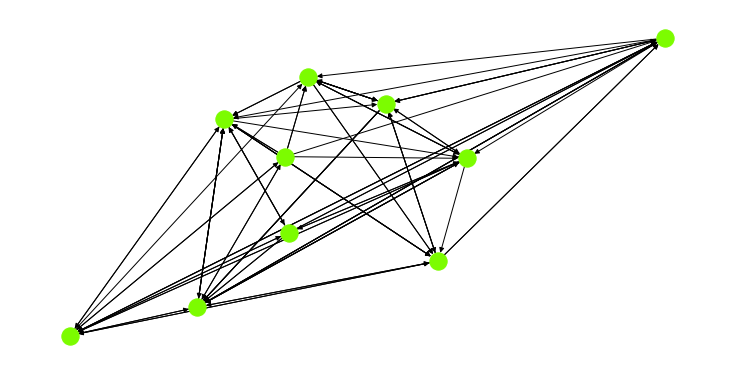

In [93]:
graph = get_connected_graph(10)
pos = nx.random_layout(graph)
draw_graph(graph, pos)

#### metoda potęgowa

In [94]:
def power_method(A, epsilon=1e-8, max_iteration=100):
    def norm_inf(x): return np.linalg.norm(x, np.inf)
    def normalize(x): return x/np.linalg.norm(x)
    
    n = A.shape[0]
    prev_x = np.ones(n)
    x = A @ prev_x
    
    max_x = norm_inf(x)
    x = x/max_x
    iteration = 1
    
    while iteration < max_iteration and not np.allclose(x, prev_x, atol=epsilon) and not np.allclose(x, -prev_x, atol=epsilon):
        x, prev_x = A @ x, x
        max_x = norm_inf(x)
        x = x/max_x
        iteration += 1
        
    return max_x, normalize(x), iteration

#### ranking

<i>Zaimplementuj prosty model błądzenia przypadkowego po grafie skierowanym</i>

In [98]:
def simple_rank(graph):
    n = graph.number_of_nodes()
    A = np.zeros((n, n))
    
    for u in range(n):
        for v in range(n):
            if (u, v) in graph.edges():
                A[u][v] = 1/len(graph[u])
                
    _, r, _ = power_method(A.T)
    
    for u in range(n):
        graph.nodes[u]['weight'] = r[u]
    
    return graph, r

In [99]:
graph, rank = simple_rank(graph)

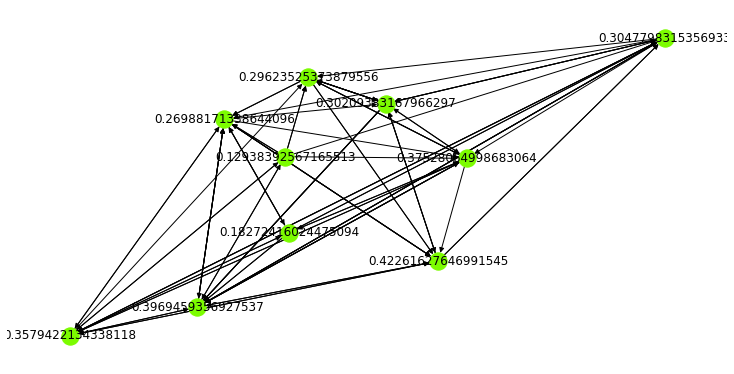

In [100]:
draw_graph(graph, pos)

## 2. Page Rank

In [91]:
def page_rank(graph):
    pass

przeanalizować wynik, zobaczyć co oznaczają, można porównać z pagerank z networkx

## Wnioski